In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import re

from matplotlib import pyplot as plt

In [9]:
logfile = '../unet/test_log.tsv'
SUPER_TITLE = 'DenseNet-S'
logs = pd.read_table(logfile, header=0, index_col=None)

# Get training step and magnification as columns
def add_cols(logs):
    steppatt = r'.-(?P<step>\d+)'
    magpatt = r'^(?P<mag>\d{1,2}x)/.+'
    steps = []
    mags = []
    for x in logs['SNAPSHOT']:
        step = re.findall(pattern=steppatt, string=x)[0]
        mag = re.findall(pattern=magpatt, string=x)[0]
        steps.append(int(step))
        mags.append(mag)

    tdf = pd.DataFrame({'STEP': steps, 'MAG': mags}, index=logs.index)
    logs = logs.join(tdf, how='inner')
    return logs

logs = add_cols(logs)


Text(0,0.5,'DenseNet-S')

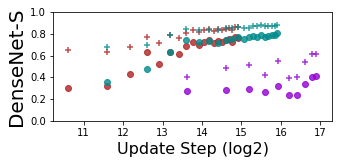

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(5,2))
# f1_cols = ['G3_F1', 'G4_F1', 'G5_F1', 'BN_F1', 'ST_F1', 'OVERALL_F1']
# a_cols = ['G3_A', 'G4_A', 'G5_A', 'BN_A', 'ST_A', 'OVERALL_A']
f1_cols = ['OVERALL_F1']
a_cols = ['OVERALL_A']
colors = ['firebrick', 'darkcyan', 'darkviolet']

for mag, color in zip(['5x', '10x', '20x'], colors):
    df = logs.iloc[[mag in x for x in logs['SNAPSHOT']], :]
#     for ax, a_col, f1_col in zip(axs, a_cols, f1_cols):
#         sns.regplot(np.log2(df['STEP']), df[a_col], fit_reg=False, label=mag+' Acc', ax=ax, color=color, marker='+')
#         sns.regplot(np.log2(df['STEP']), df[f1_col], fit_reg=False, label=mag+' F1', ax=ax, color=color)

    sns.regplot(np.log2(df['STEP']), df['OVERALL_A'], fit_reg=False, label=mag+' Acc', ax=axs, color=color, marker='+')
    sns.regplot(np.log2(df['STEP']), df['OVERALL_F1'], fit_reg=False, label=mag+' F1', ax=axs, color=color)
    
# for ax, col in zip(axs, a_cols):
# axs.set_title(col.replace('_A', ''))
axs.set_ylabel('')
axs.set_ylim([0,1.])
axs.set_xlabel('Update Step (log2)', fontsize=16)
# axs.set_xlabel('')
    
# plt.legend(bbox_to_anchor=(1.01, 0.9))
# axs.set_title('Overall Accuracy and F1-scores', fontsize=22)
axs.set_ylabel('{}'.format(SUPER_TITLE), fontsize=20)
# plt.savefig('/home/ing/Dropbox/_Papers/gleason_grade/pixel_performance_{}.pdf'.format(SUPER_TITLE), bbox_inches='tight')

In [11]:
## Max overall Accuracy
logs.sort_values(by='OVERALL_A', ascending=False)

,SNAPSHOT,G3_A,G4_A,G5_A,BN_A,ST_A,G3_F1,G4_F1,G5_F1,BN_F1,ST_F1,OVERALL_A,OVERALL_F1,MAG,STEP
37,10x/snapshots/unet.ckpt-61690,0.958044,0.945003,0.971437,0.969933,0.921173,0.748374,0.855805,0.781523,0.696004,0.935505,0.882795,0.803442,10x,61690
32,10x/snapshots/unet.ckpt-46500,0.956090,0.943141,0.967032,0.971971,0.917586,0.724182,0.850468,0.740722,0.720337,0.933169,0.877910,0.793776,10x,46500
35,10x/snapshots/unet.ckpt-55800,0.950277,0.937551,0.967591,0.970121,0.924628,0.715357,0.835131,0.753117,0.702611,0.937954,0.875084,0.788834,10x,55800
36,10x/snapshots/unet.ckpt-58900,0.950173,0.938325,0.966870,0.971279,0.922298,0.712397,0.835309,0.750872,0.717635,0.936183,0.874473,0.790479,10x,58900
34,10x/snapshots/unet.ckpt-52700,0.957228,0.940212,0.969016,0.967383,0.913960,0.721200,0.844152,0.766159,0.657765,0.930340,0.873900,0.783923,10x,52700
33,10x/snapshots/unet.ckpt-49600,0.950140,0.935923,0.966146,0.965212,0.919906,0.695978,0.834280,0.754406,0.627406,0.934248,0.868663,0.769264,10x,49600
31,10x/snapshots/unet.ckpt-43400,0.948522,0.934692,0.963717,0.967941,0.920528,0.704549,0.824746,0.737834,0.664355,0.934817,0.867700,0.773260,10x,43400
30,10x/snapshots/unet.ckpt-40300,0.945371,0.936385,0.972065,0.969757,0.911281,0.663086,0.829952,0.769349,0.693013,0.928690,0.867430,0.776818,10x,40300
26,10x/snapshots/unet.ckpt-31000,0.949041,0.930987,0.964033,0.969946,0.915356,0.676312,0.812290,0.740446,0.702535,0.931480,0.864682,0.772612,10x,31000
14,5x/snapshots/unet.ckpt-30845,0.948904,0.932361,0.955083,0.962711,0.919452,0.711807,0.813197,0.722652,0.607588,0.933080,0.859256,0.757665,5x,30845


In [5]:
## Max overall F1
logs.sort_values(by='OVERALL_F1', ascending=False)

,SNAPSHOT,G3_A,G4_A,G5_A,BN_A,ST_A,G3_F1,G4_F1,G5_F1,BN_F1,ST_F1,OVERALL_A,OVERALL_F1,MAG,STEP
37,10x/snapshots/unet.ckpt-61690,0.958044,0.945003,0.971437,0.969933,0.921173,0.748374,0.855805,0.781523,0.696004,0.935505,0.882795,0.803442,10x,61690
32,10x/snapshots/unet.ckpt-46500,0.956090,0.943141,0.967032,0.971971,0.917586,0.724182,0.850468,0.740722,0.720337,0.933169,0.877910,0.793776,10x,46500
36,10x/snapshots/unet.ckpt-58900,0.950173,0.938325,0.966870,0.971279,0.922298,0.712397,0.835309,0.750872,0.717635,0.936183,0.874473,0.790479,10x,58900
35,10x/snapshots/unet.ckpt-55800,0.950277,0.937551,0.967591,0.970121,0.924628,0.715357,0.835131,0.753117,0.702611,0.937954,0.875084,0.788834,10x,55800
34,10x/snapshots/unet.ckpt-52700,0.957228,0.940212,0.969016,0.967383,0.913960,0.721200,0.844152,0.766159,0.657765,0.930340,0.873900,0.783923,10x,52700
30,10x/snapshots/unet.ckpt-40300,0.945371,0.936385,0.972065,0.969757,0.911281,0.663086,0.829952,0.769349,0.693013,0.928690,0.867430,0.776818,10x,40300
31,10x/snapshots/unet.ckpt-43400,0.948522,0.934692,0.963717,0.967941,0.920528,0.704549,0.824746,0.737834,0.664355,0.934817,0.867700,0.773260,10x,43400
26,10x/snapshots/unet.ckpt-31000,0.949041,0.930987,0.964033,0.969946,0.915356,0.676312,0.812290,0.740446,0.702535,0.931480,0.864682,0.772612,10x,31000
13,5x/snapshots/unet.ckpt-29450,0.940110,0.928331,0.964795,0.966498,0.917264,0.681940,0.795076,0.769459,0.676196,0.931384,0.858499,0.770811,5x,29450
33,10x/snapshots/unet.ckpt-49600,0.950140,0.935923,0.966146,0.965212,0.919906,0.695978,0.834280,0.754406,0.627406,0.934248,0.868663,0.769264,10x,49600


## Model comparison

In [42]:
# unet_log = '../unet/unet_log.tsv'
# unet_log = pd.read_table(unet_log, header=0, index_col=None)
# unet_log = add_cols(unet_log)

tiramisu_log = '../densenet/test_log.tsv'
tiramisu_log = pd.read_table(tiramisu_log, header=0, index_col=None)
tiramisu_log = add_cols(tiramisu_log)

fcn_log = '../fcn8s/test_log.tsv'
fcn_log = pd.read_table(fcn_log, header=0, index_col=None)
fcn_log = add_cols(fcn_log)